# 12-11-2020

# KNN Algorithm 
In this notebook we analyse the **cancer dataset** for prediction using **K-nearest neighbours** machine learning Algorithm.

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('C:/Users/podug/Desktop/Datahill/Material/cancer.csv')

## Investigating the dataset

In [4]:
dataset.shape

(569, 32)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### The cancer dataset is free of null values. So Data Handling is not required.

In [6]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concavepoints_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
dataset.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [8]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Extracting Independent and Dependent features

In [10]:
# Extracting Independent features
X = dataset.iloc[:,2:]

In [11]:
# Extracting Dependent features
y = dataset.iloc[:,1]

In [12]:
X.shape, y.shape

((569, 30), (569,))

In [14]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Encoding the categorical features

In [16]:
y = pd.get_dummies(y, drop_first = True)

In [17]:
y.iloc[:5]

,M
0,1
1,1
2,1
3,1
4,1


## Converting the dataframes to numpy arrays

In [18]:
X = X.values
y = y.values

In [19]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

## Scaling the Independent features

In [20]:
# Importing StandardScaler class of sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Creating the StandardScalar instance
Sc = StandardScaler()

# Scaling the Independent features
X = Sc.fit_transform(X)

## Splitting the dataset into Training set and Test set

In [22]:
# Importing train_test_split class of sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398, 1), (171, 1))

In [34]:
np.ndim(y_train)

2

In [35]:
y_train = y_train.ravel()

In [39]:
y_train.shape, np.ndim(y_train)

((398,), 1)

## Fitting K-NN Classifier to the training set

In [26]:
# Importing KNeighborsClassifier class of sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Creating KNeighborsClassifier instance
classifier = KNeighborsClassifier(n_neighbors = 1)

# Fitting the classifier to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_train[:5]

array([0, 0, 0, 1, 0], dtype=uint8)

## Predicting the test labels

In [40]:
y_pred = classifier.predict(X_test)

## Evaluating the model performance

In [41]:
# Importing confusion_matrix class of sklearn.metrics
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [43]:
conf_matrix

array([[102,   6],
       [  5,  58]], dtype=int64)

## Improving the model performance by changing the k-value

In [49]:
# With k = 3

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[106,   2],
       [  7,  56]], dtype=int64)

In [50]:
# With k = 5

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  6,  57]], dtype=int64)

In [51]:
# With k = 7

classifier = KNeighborsClassifier(n_neighbors = 7)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[106,   2],
       [  6,  57]], dtype=int64)

In [52]:
# With k = 9

classifier = KNeighborsClassifier(n_neighbors = 9)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[106,   2],
       [  5,  58]], dtype=int64)

In [53]:
# With k = 11

classifier = KNeighborsClassifier(n_neighbors = 11)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  6,  57]], dtype=int64)

In [54]:
# With k = 13

classifier = KNeighborsClassifier(n_neighbors = 13)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[106,   2],
       [  5,  58]], dtype=int64)

In [55]:
# With k = 15

classifier = KNeighborsClassifier(n_neighbors = 15)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  5,  58]], dtype=int64)

In [56]:
# With k = 17

classifier = KNeighborsClassifier(n_neighbors = 17)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[106,   2],
       [  7,  56]], dtype=int64)

In [57]:
# With k = 19

classifier = KNeighborsClassifier(n_neighbors = 19)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  8,  55]], dtype=int64)

In [58]:
# With k = 21

classifier = KNeighborsClassifier(n_neighbors = 21)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[108,   0],
       [  8,  55]], dtype=int64)

In [63]:
# With k = 25

classifier = KNeighborsClassifier(n_neighbors = 25)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  9,  54]], dtype=int64)

In [62]:
# With k = 43

classifier = KNeighborsClassifier(n_neighbors = 43)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[107,   1],
       [  9,  54]], dtype=int64)

## Evaluating the Accuracy score

In [44]:
# Importing accuravy_score class of sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.935672514619883


## Visualizing the model accuracy

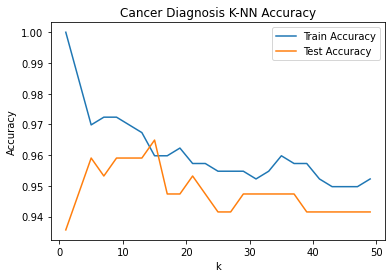

In [61]:
k = range(1,50,2)
train_accuracy = []
test_accuracy = []

for n_neighbors in k:
    
    # Fitting the model
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier.fit(X_train, y_train)
    
    # Recording training set accuracy
    train_accuracy.append(classifier.score(X_train, y_train))
    
    # Recording test set accuracy
    test_accuracy.append(classifier.score(X_test, y_test))
    
plt.plot(k, train_accuracy, label='Train Accuracy')
plt.plot(k, test_accuracy, label='Test Accuracy')
plt.title('Cancer Diagnosis K-NN Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

##### Model shows a better performance at k=15